In [2]:
import numpy as np             
import matplotlib.pyplot as plt
import pandas as pd             
import seaborn as sns
import sklearn                 
import nltk        

Задача представляет собой бинарную классификацию, оценивающую задержку вылета. Используется классификационный набор данных с подробной информацией об авиакомпаниях, погоде, аэропортах и занятости. Данные содержат дату и аэропорт вылета, информацию о самолете (кол-во мест, авиакомпанию, срок службы), об авиакомпании (среднее кол-во рейсов в месяц, среднее кол-во пассажиров за месяц, кол-во бортпроводников), о погоде (осадки за день, кол-во выпавшего снега, кол-во снега за день, макс. температуру за день, макс. скорость ветра за день), об аэропорте (название, широта, долгота, среднее кол-о вылетов в месяц, среднее кол-во пассажиров за месяц) 

In [3]:
data = pd.read_csv('full_data_flightdelay.csv')
data

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,12,7,0,2300-2359,1,11,3,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489058,12,7,0,1800-1859,1,11,2,123,Hawaiian Airlines Inc.,1318,...,16,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489059,12,7,0,2000-2059,1,11,2,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489060,12,7,0,2100-2159,1,12,3,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21


In [4]:
data.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

In [5]:
dep_time_blk = data['DEP_TIME_BLK'].value_counts().index.values.tolist()
data['DEP_TIME_BLK'] = data['DEP_TIME_BLK'].replace(dep_time_blk, range(len(dep_time_blk)))

carrier_names = data['CARRIER_NAME'].value_counts().index.values.tolist()
data['CARRIER_NAME'] = data['CARRIER_NAME'].replace(carrier_names, range(len(carrier_names)))

departing_airports = data['DEPARTING_AIRPORT'].value_counts().index.values.tolist()
data['DEPARTING_AIRPORT'] = data['DEPARTING_AIRPORT'].replace(departing_airports, range(len(departing_airports)))

previous_airports = data['PREVIOUS_AIRPORT'].value_counts().index.values.tolist()
data['PREVIOUS_AIRPORT'] = data['PREVIOUS_AIRPORT'].replace(previous_airports, range(len(previous_airports)))

Основные статистические характеристики:

mean - среднее значение, std - стандартное отклонение, min - минимум, 25% - нижнее значение первого квантиля, 50% - медиана, 75% - верхнее значение первого квантиля, max - максимум

In [17]:
data.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
count,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,...,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06
mean,6.607062e+00,3.935598e+00,1.891441e-01,7.560840e+00,3.821102e+00,3.046890e+00,2.783675e+01,1.337397e+02,4.083827e+00,1.268458e+04,...,1.153211e+01,2.163414e+01,3.670581e+01,-9.425515e+01,3.274267e+01,1.037063e-01,3.159310e-02,9.152397e-02,7.146846e+01,8.341329e+00
std,3.396853e+00,1.995200e+00,3.916231e-01,4.951522e+00,2.382233e+00,1.757864e+00,2.151060e+01,4.645213e+01,4.096890e+00,8.839796e+03,...,6.935706e+00,2.094335e+01,5.500804e+00,1.790952e+01,4.843934e+01,3.432134e-01,3.170163e-01,7.281285e-01,1.835333e+01,3.607604e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,0.000000e+00,1.100000e+03,...,0.000000e+00,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00
25%,4.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,1.000000e+00,5.345000e+03,...,5.000000e+00,5.000000e+00,3.343600e+01,-1.063770e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,7.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,3.000000e+00,1.156200e+04,...,1.200000e+01,1.500000e+01,3.750500e+01,-8.790600e+01,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00
75%,1.000000e+01,6.000000e+00,0.000000e+00,1.200000e+01,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,6.000000e+00,1.761500e+04,...,1.700000e+01,3.200000e+01,4.077900e+01,-8.093600e+01,4.200000e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.800000e+01,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,1.600000e+01,3.525600e+04,...,3.200000e+01,9.500000e+01,6.116900e+01,-6.600200e+01,3.550000e+02,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01


Матрица корреляции

In [15]:
corr_matrix = data.corr()
corr_matrix

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
MONTH,1.000000,0.006727,-0.019049,0.001285,-0.002561,0.016712,0.022951,0.003155,0.004494,0.036913,...,-0.017344,0.008426,0.012913,-0.004548,0.007528,-0.005133,-0.053596,-0.088596,0.173454,-0.119272
DAY_OF_WEEK,0.006727,1.000000,-0.000199,-0.000016,0.013550,-0.029812,-0.027214,0.009300,0.009531,-0.001725,...,-0.005785,0.002104,-0.011503,-0.006120,0.000634,0.018205,-0.005883,-0.009878,0.007513,0.001785
DEP_DEL15,-0.019049,-0.000199,1.000000,0.109707,0.016289,0.117528,0.009028,0.011845,0.002282,0.026740,...,0.006220,-0.037350,0.000490,0.027097,0.001224,0.080277,0.050156,0.026129,-0.008936,0.050947
DEP_TIME_BLK,0.001285,-0.000016,0.109707,1.000000,-0.023425,0.513718,-0.030508,0.005975,0.005489,0.076239,...,-0.002680,-0.076022,-0.025895,-0.036213,0.100704,-0.006877,-0.005312,-0.002603,0.015165,0.002143
DISTANCE_GROUP,-0.002561,0.013550,0.016289,-0.023425,1.000000,-0.237415,-0.035572,0.447485,-0.080648,-0.013700,...,-0.138314,-0.083997,-0.011182,-0.159929,-0.216487,-0.012478,-0.000485,-0.007388,0.003697,0.023392
SEGMENT_NUMBER,0.016712,-0.029812,0.117528,0.513718,-0.237415,1.000000,0.014240,-0.202832,0.042846,0.042633,...,0.076003,-0.013987,-0.034347,-0.070426,0.298659,-0.016279,-0.014711,-0.006888,0.029219,-0.024107
CONCURRENT_FLIGHTS,0.022951,-0.027214,0.009028,-0.030508,-0.035572,0.014240,1.000000,-0.054131,-0.001297,0.849023,...,0.036077,-0.703334,0.018230,0.118662,0.294542,-0.015074,-0.017250,-0.027321,0.026031,0.059272
NUMBER_OF_SEATS,0.003155,0.009300,0.011845,0.005975,0.447485,-0.202832,-0.054131,1.000000,-0.313814,0.003574,...,-0.102969,-0.075024,-0.136366,-0.161854,-0.370717,-0.014044,-0.008511,-0.015707,0.061254,-0.018506
CARRIER_NAME,0.004494,0.009531,0.002282,0.005489,-0.080648,0.042846,-0.001297,-0.313814,1.000000,-0.026288,...,-0.208774,0.068977,-0.045621,0.014314,0.198514,0.001053,-0.001205,0.006436,-0.002710,0.018460
AIRPORT_FLIGHTS_MONTH,0.036913,-0.001725,0.026740,0.076239,-0.013700,0.042633,0.849023,0.003574,-0.026288,1.000000,...,0.027185,-0.814133,0.019066,0.091296,0.272190,-0.010380,-0.009837,-0.032679,0.038819,0.071717


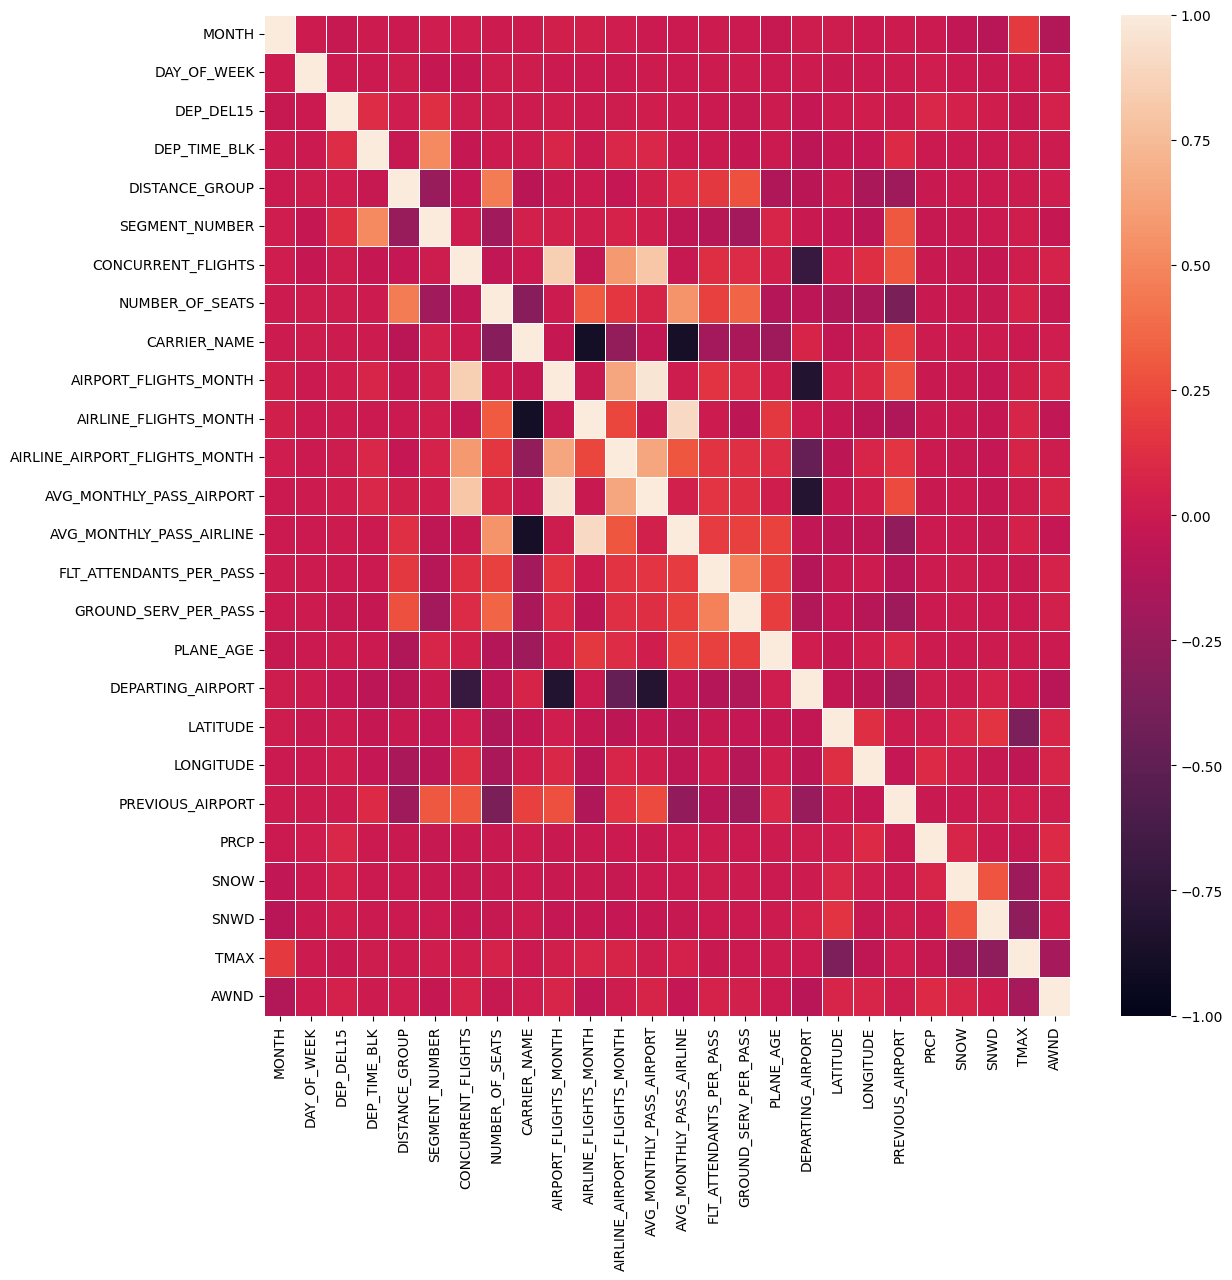

In [16]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, linewidths=.5)
pass